<a href="https://colab.research.google.com/github/vbaezfortunato/Proyecto-Final/blob/master/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final**

Cargar Librerias a Utilizar

In [625]:
import tensorflow.compat.v1 as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.externals import joblib
import sklearn as sk
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from tensorflow import keras
import imageio as imio
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals import joblib
from sklearn import tree
import graphviz
import datetime 
from scipy import stats
import seaborn as sns
from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

%load_ext tensorboard

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [626]:

titanic_dt = pd.read_csv('/content/gdrive/My Drive/data_titanic_proyecto.csv')
titanic_dt.head(15)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N
5,6,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,Lower,M,N
6,7,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,Upper,M,N
7,8,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,Lower,M,N
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,Lower,F,Y
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,Middle,F,Y


**Engineer Features**



*   Verificando for Null Values




In [627]:

titanic_dt.isnull().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

Resolviendo los valores faltante de Age mediante median input:




In [628]:
titanic_dt["Age"] = titanic_dt["Age"].fillna(titanic_dt["Age"].median());
titanic_dt["Age"].isnull().sum()

0

Para Embarked le asignare el valor que mas se repita

In [629]:
titanic_dt["Embarked"] = titanic_dt["Embarked"].fillna('S')
titanic_dt["Embarked_S"] = (titanic_dt["Embarked"] == 'S').astype(np.float32)
titanic_dt["Embarked_C"] = (titanic_dt["Embarked"] == 'C').astype(np.float32)
titanic_dt["Embarked_Q"] = (titanic_dt["Embarked"] == 'Q').astype(np.float32)

usar hot encode

In [630]:
titanic_dt["Class_Lower"] = (titanic_dt["passenger_class"] == 'Lower').astype(np.float32)
titanic_dt["Class_Middle"] = (titanic_dt["passenger_class"] == 'Middle').astype(np.float32)
titanic_dt["Class_Upper"] = (titanic_dt["passenger_class"] == 'Upper').astype(np.float32)

Normalizar Datos



In [750]:

titanic_dt["Sex"] = (titanic_dt["passenger_sex"] == 'F').astype(np.float)
titanic_dt["Survived"] = (titanic_dt["passenger_survived"].values == 'Y').astype(np.float32)
titanic_dt["Age"]=(titanic_dt["Age"]-titanic_dt["Age"].min())/(titanic_dt["Age"].max()-titanic_dt["Age"].min())
titanic_dt["Fare"]=(titanic_dt["Fare"]-titanic_dt["Fare"].min())/(titanic_dt["Fare"].max()-titanic_dt["Fare"].min())
titanic_dt.head(3)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Sex,Survived
0,1,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,NaN,S,Lower,M,N,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,C,Upper,F,Y,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,Lower,F,Y,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Validacion

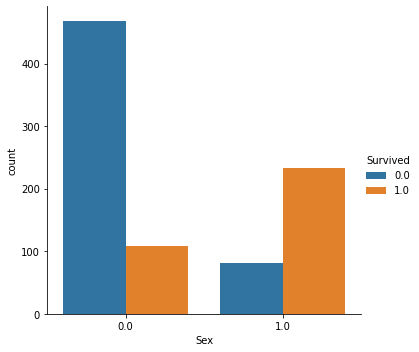

In [632]:
sns.catplot('Sex',data=titanic_dt,kind='count',hue='Survived')

Segun el grafico las mujeres tenia mas posibilidad de sobrevivir que los hombres


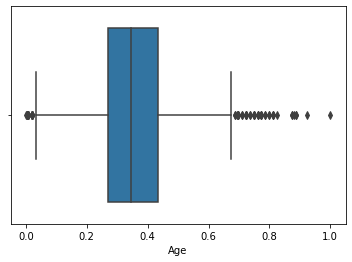

In [633]:
sns.boxplot('Age',data=titanic_dt)

Segun Boxplot la media de edad de las personas en el titanic era entre 27 y 29 anios

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


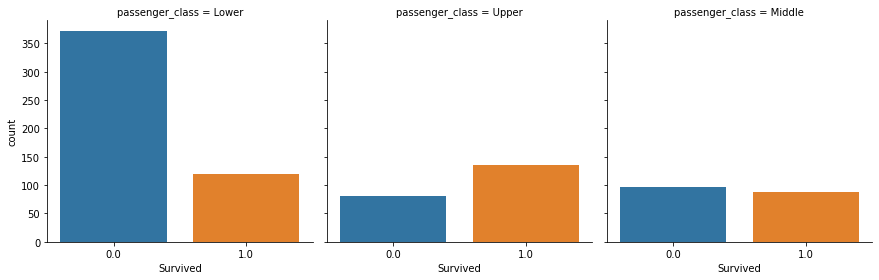

In [634]:
sns.factorplot('Survived',
               data=titanic_dt,
               kind='count',col='passenger_class',
               col_wrap=4,height=4,aspect=1)

La clase pobre tuvo mayor perdida segun la grafica de barra

**Separados los datos entre train and test**

In [751]:
titanic_dt[NumFields]

,Age,SibSp,Parch,Fare,Sex,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper
0,0.271174,1,0,0.014151,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.472229,1,0,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.321438,0,0,0.015469,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.434531,1,0,0.103644,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0,0,0.015713,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,0.233476,0,0,0.058556,1.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.346569,1,2,0.045771,1.0,1.0,0.0,0.0,1.0,0.0,0.0
889,0.321438,0,0,0.058556,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [635]:
# Obtener las variables para los modelos
NumFields = ["Age", "SibSp", "Parch", "Fare", "Sex", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]

y = titanic_dt["Survived"].values
X = titanic_dt[NumFields].values

X.shape, y.shape

((891, 11), (891,))

In [636]:


X_train_c,X_test,y_train_c,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_c, y_train_c, 
                                                  test_size = 0.2, 
                                                  random_state = 0)

X_train.shape, X_val.shape, X_test.shape

((569, 11), (143, 11), (179, 11))

In [637]:

print("Range: ", X_train.ndim)
print("Format: ", X_train.shape)
print("Type: ", type(X_train))
print(X_train)

Range:  2
Format:  (569, 11)
Type:  <class 'numpy.ndarray'>
[[0.43453129 1.         0.         ... 0.         0.         1.        ]
 [0.4722292  0.         0.         ... 1.         0.         0.        ]
 [0.34656949 0.         0.         ... 1.         0.         0.        ]
 ...
 [0.28373963 0.         0.         ... 0.         1.         0.        ]
 [0.04498618 0.         2.         ... 1.         0.         0.        ]
 [0.37170143 0.         0.         ... 0.         0.         1.        ]]


In [638]:
print("Range: ",  X_val.ndim)
print("Format: ",  X_val.shape)
print("Type: ", type( X_val))
print( X_val)

Range:  2
Format:  (143, 11)
Type:  <class 'numpy.ndarray'>
[[0.45966323 1.         0.         ... 0.         0.         1.        ]
 [0.34656949 1.         0.         ... 1.         0.         0.        ]
 [0.50992712 0.         0.         ... 1.         0.         0.        ]
 ...
 [0.37170143 0.         0.         ... 1.         0.         0.        ]
 [0.2963056  0.         0.         ... 0.         0.         1.        ]
 [0.42196532 0.         0.         ... 1.         0.         0.        ]]


Modelos

**SVM**

In [639]:



svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = 10., kernel='rbf', gamma = 0.01, tol = 0.001, max_iter = 5000))
])


svm_model.fit(X_train, y_train.reshape(len(y_train), ));
svm_model.score(X_train, y_train), svm_model.score(X_val, y_val)

(0.8418277680140598, 0.7832167832167832)

In [640]:
y_pred = svm_model.predict(X_val)
(metrics.accuracy_score(y_val, y_pred, normalize=True), 
    metrics.f1_score(y_val, y_pred), 
    metrics.precision_score(y_val, y_pred), 
    metrics.recall_score(y_val, y_pred, average='weighted'))

(0.7832167832167832,
 0.7102803738317757,
 0.8085106382978723,
 0.7832167832167832)

In [641]:
def SVM(X, y, C_param): 
    
    svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(C = C_param, kernel='rbf', tol = 0.001, max_iter = 5000))])
    
   
    svm_model.fit(X, y.reshape(len(y), ))
    
    return svm_model

In [642]:
def getM(modelo, X_train, y_train, X_val, y_val):
    
    y_pred = modelo.predict(X_train)
    trainMetrics = [ metrics.accuracy_score(y_train, y_pred, normalize=True), 
                     metrics.f1_score(y_train, y_pred), 
                     metrics.precision_score(y_train, y_pred), 
                     metrics.recall_score(y_train, y_pred, average='weighted')]
    

    y_pred = modelo.predict(X_val)
    validationMetrics = [metrics.accuracy_score(y_val, y_pred, normalize=True), 
                    metrics.f1_score(y_val, y_pred), 
                    metrics.precision_score(y_val, y_pred), 
                    metrics.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

**Grid-search**

In [643]:

C_param_list = [0.1, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 15., 20., 25.]
trainMetricslist = []
valMetricslist = []
for c in C_param_list:
    svm = SVM(X_train, y_train, C_param = c)
    trainMetrics, valMetrics = getM(svm, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Tratando the usar K-folds

In [644]:

from sklearn.model_selection import GridSearchCV

parameters = {'svc__C' : [0.1, 0.5, 1., 2., 3., 4., 5.], 
              'svc__gamma' : [0.1, 0.5, 1., 2., 3., 5.]}

svc = SVC(gamma="scale")
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = 'rbf', tol = 0.001, max_iter = 5000))])

clf = GridSearchCV(svm_model, parameters, cv=5, iid=False, verbose=True, n_jobs=4)
clf.fit(X_train_c, y_train_c)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:    4.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=5000,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

**job Library**

In [645]:

# Mejor modelo de SVM
svm_final = SVM(X_train, y_train, C_param = 9)

# Se guarda el mejor modelo
joblib.dump(svm_final, "/content/gdrive/My Drive/svm.pkl")


['/content/gdrive/My Drive/svm.pkl']

**Decision Tree**

In [646]:

def Dec_tree(X, y, max_depth): 
   
    tree_model = tree.DecisionTreeClassifier(max_depth = max_depth)
    tree_model.fit(X, y)

    return tree_model

Dec_tree(X_train, y_train, 2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [647]:
trainMetricslist = []
valMetricslist = []
depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for depth in depth_list: 
    tree_model = Dec_tree(X_train, y_train, depth)
    trainMetrics, valMetrics = getM(tree_model, X_train, y_train, X_val, y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

In [648]:
treeResults = pd.DataFrame(np.column_stack((depth_list, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Depth', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
treeResults

,Depth,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,2.0,0.806678,0.745370,0.735160,0.806678,0.734266,0.683333,0.683333,0.734266
1,3.0,0.850615,0.790123,0.833333,0.850615,0.762238,0.685185,0.770833,0.762238
2,4.0,0.854130,0.795062,0.838542,0.854130,0.762238,0.685185,0.770833,0.762238
3,5.0,0.875220,0.811671,0.932927,0.875220,0.741259,0.633663,0.780488,0.741259
4,6.0,0.894552,0.850746,0.904762,0.894552,0.734266,0.660714,0.711538,0.734266
5,7.0,0.910369,0.875912,0.909091,0.910369,0.734266,0.672414,0.696429,0.734266
6,8.0,0.927944,0.896725,0.967391,0.927944,0.741259,0.660550,0.734694,0.741259
7,9.0,0.947276,0.925743,0.979058,0.947276,0.727273,0.635514,0.723404,0.727273
8,10.0,0.959578,0.943210,0.994792,0.959578,0.727273,0.642202,0.714286,0.727273
9,11.0,0.964851,0.950739,1.000000,0.964851,0.713287,0.630631,0.686275,0.713287


In [649]:

tree_final = Dec_tree(X_train_c, y_train_c, max_depth = 9)


joblib.dump(tree_final, "/content/gdrive/My Drive/decision_tree.pkl")


(metrics.accuracy_score(y_train, tree_final.predict(X_train)), 
metrics.accuracy_score(y_val, tree_final.predict(X_val)), 
metrics.accuracy_score(y_train_c, tree_final.predict(X_train_c)))

(0.9226713532513181, 0.9020979020979021, 0.9185393258426966)

**Naive**

In [650]:

def probFeature(pdDataFrame, featureName, x, qsize):

    f, bins_f = pd.qcut(pdDataFrame[featureName], qsize, retbins=True, duplicates='drop')

    rango = pd.cut(x, bins = bins_f)
    

    if rango.isnull().any():
        return 0, bins_f
    
    return (f.value_counts()[rango] / len(f)).values, bins_f



def probFeatureD(pdDataFrame, featureName, x, className, label, bins_f):

    f = pd.cut(pdDataFrame.loc[pdDataFrame[className] == label , featureName], 
               bins = bins_f, include_lowest=True)

    rango = pd.cut(x, bins = bins_f, include_lowest=True)
    

    if rango.isnull().any():
        return np.zeros(len(x))
    
    return (f.value_counts()[rango] / len(f)).values

    

def probLabel(pdDataFrame, className, label):
    p = pdDataFrame.loc[pdDataFrame[className] == label, className].count() / len(pdDataFrame)
    return p

def probLabelD(pdDataFrame, featureName, x, className, label):

    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == 1), featureName].count()
    
    pLabel = pInt/pClass
    pNotLabel = 1. - pLabel
    prob = np.array([pNotLabel, pLabel])
    
    return prob[x.astype(int)]
    

def predecirNB(Titanic, TitanicEval):
    age = TitanicEval.Age.values
    fare = TitanicEval.Fare.values

    
    _, binsAge = probFeature(Titanic, "Age", age, 5)
    _, binsFare = probFeature(Titanic, "Fare", fare, 5)

 
    BinaryFields = ["Sex"]
    
    survived_list = [0,1]
    p_survived = []
   
    for survived in survived_list:
        
        pAgeGivenS = probFeatureD(Titanic, "Age", age, "Survived", survived, binsAge)
        pFareGivenS = probFeatureD(Titanic, "Fare", fare, "Survived", survived, binsFare)

       
        pbinaryFeature = np.ones(len(TitanicEval.values))
        for binaryFeature in BinaryFields:
            pbinaryFeature = probLabelD(Titanic, binaryFeature, 
                                                TitanicEval[binaryFeature].values, 
                                                "Survived", survived)

        
        pSurvived = probLabel(Titanic, "Survived", survived)
       
        p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )

  
    p_survived = np.array(p_survived)
    p_survived_yes = p_survived[1,:] / np.sum(p_survived, axis=0)
    
    return np.array([p > 0.5 for p in p_survived_yes]).astype(np.float)


In [651]:
fields = ["Age", "Fare", "Sex", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]
Filter = [0,3,4,5,6,7,8,9,10]




Titanic_t = pd.DataFrame(np.column_stack(
    (X_train[:, Filter], y_train)), columns=fields)

In [652]:

yhat_NBmanual_train = predecirNB(Titanic_t, Titanic_t)
yhat_NBmanual_train


metrics.accuracy_score(y_train, yhat_NBmanual_train)

0.7996485061511424

In [653]:
NBFieldsEval = ["Age", "Fare", "Sex", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]
Filter_q = [0,3,4,5,6,7,8,9,10]
eval = pd.DataFrame((X_val[:, Filter]), columns=NBFieldsEval)

In [654]:
print(eval.index.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]


In [655]:
yhat_NB = predecirNB(Titanic_t,eval)
yhat_NB

metrics.accuracy_score(y_val,yhat_NB)

0.5804195804195804

In [656]:
# Se guarda el mejor modelo de NB junto con su filtro de variables
np.savez(file = "modeloNBpandas.npz", NB_Filter = Filter, 
        NBFieldsEval = NBFieldsEval,
        Titanic_train = Titanic_t)

In [657]:
def train_log(Xtrain, Ytrain, lr, lambda_val, epochs):
    import time
    m, k = Xtrain.shape
    string = './graphs/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"_lr="+str(lr)+ "_epochs="+str(epochs)
    tf.reset_default_graph()
    g = tf.Graph()

    with g.as_default():
       
        X = tf.placeholder(tf.float32, shape = (None, k), name = "X")
        Ylabels = tf.placeholder(tf.float32, name = "Ylabels")

       
        lr_param = tf.placeholder(tf.float32, name = "lr")
        lambda_param = tf.placeholder(tf.float32, name = "lambda")

        
        W = tf.Variable(tf.truncated_normal(shape = [k, 1]), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1)), name = "b")
        
        
        with tf.name_scope("Logits"):
            Logits = tf.add(tf.matmul(X, W), b, name = "Logits")
            YlabelsHat = tf.nn.sigmoid(Logits)

        
        with tf.name_scope("FuncionCosto"):
           
            w_norm = tf.divide(tf.multiply(tf.multiply(tf.constant(0.5), lambda_param), 
                                 tf.reduce_sum(tf.square(W))), tf.cast(m, tf.float32), name = "W_norm")
           
            classif_term = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                labels = Ylabels, logits = Logits), name = "CostoClasif") 
           
            cost = tf.add(classif_term, w_norm, name="Costo")

       
        with tf.name_scope("GradientDes.Optimizer"):
            optimizer = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 
        
        
        init = tf.global_variables_initializer() 
        
   
    
    start = time.time()
    with tf.Session(graph = g) as sess: 
       
        sess.run(init)
       
        for epoch in range(epochs):
            _, c_ = sess.run([optimizer, cost], 
                             feed_dict = {X : Xtrain, Ylabels : Ytrain.reshape((m, 1)), 
                                          lr_param : lr, lambda_param : lambda_val})
          
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t costo = %0.4f" % (epoch+1, c_))
                
  
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    
 
    return w_, b_

**Entrenamiento**

In [658]:
w_, b_ = train_log(X_train, y_train, lr = 0.0001, epochs = 1000, lambda_val = 0.2)

Epoch: 100, 	 costo = 0.8698
Epoch: 200, 	 costo = 0.8693
Epoch: 300, 	 costo = 0.8687
Epoch: 400, 	 costo = 0.8681
Epoch: 500, 	 costo = 0.8675
Epoch: 600, 	 costo = 0.8669
Epoch: 700, 	 costo = 0.8663
Epoch: 800, 	 costo = 0.8658
Epoch: 900, 	 costo = 0.8652
Epoch: 1000, 	 costo = 0.8646
Tiempo transcurrido: 0.96 segundos


In [659]:
w_, b_ = train_log(X_train, y_train, lr = 0.001, epochs = 1000, lambda_val = 0.5)

Epoch: 100, 	 costo = 0.9153
Epoch: 200, 	 costo = 0.9028
Epoch: 300, 	 costo = 0.8912
Epoch: 400, 	 costo = 0.8802
Epoch: 500, 	 costo = 0.8700
Epoch: 600, 	 costo = 0.8603
Epoch: 700, 	 costo = 0.8512
Epoch: 800, 	 costo = 0.8425
Epoch: 900, 	 costo = 0.8344
Epoch: 1000, 	 costo = 0.8267
Tiempo transcurrido: 0.96 segundos


In [660]:
w_, b_ = train_log(X_train, y_train, lr = 0.01, epochs = 1000, lambda_val = 0.4)

Epoch: 100, 	 costo = 1.0406
Epoch: 200, 	 costo = 0.8573
Epoch: 300, 	 costo = 0.7612
Epoch: 400, 	 costo = 0.7036
Epoch: 500, 	 costo = 0.6638
Epoch: 600, 	 costo = 0.6336
Epoch: 700, 	 costo = 0.6097
Epoch: 800, 	 costo = 0.5902
Epoch: 900, 	 costo = 0.5741
Epoch: 1000, 	 costo = 0.5605
Tiempo transcurrido: 0.98 segundos


In [661]:
def pred_log(x, weights, b):
    #sigmoide
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))
     
    # logits
    l = np.matmul(x, weights) + b
 
    y_hat = 1.0*(sigmoid(l) > 0.5)
    return y_hat

In [662]:
def get(w, b, X_train, y_train, X_val, y_val):
  
    y_pred = pred_log(X_train, w, b)
    trainMetrics = [metrics.accuracy_score(y_train, y_pred, normalize=True), 
                    metrics.f1_score(y_train, y_pred), 
                    metrics.precision_score(y_train, y_pred), 
                    metrics.recall_score(y_train, y_pred, average='weighted')]
    
    # Métricas en datos de entrenamiento
    y_pred = pred_log(X_val, w, b)
    validationMetrics = [metrics.accuracy_score(y_val, y_pred, normalize=True), 
                    metrics.f1_score(y_val, y_pred), 
                   metrics.precision_score(y_val, y_pred), 
                    metrics.recall_score(y_val, y_pred, average='weighted')]
    
    return trainMetrics, validationMetrics

In [663]:


lambda_ = [0.1, 0.5, 1., 2., 3., 4.]
trainMetricslist = []
valMetricslist = []
for lam in lambda_:
   
    w_, b_ = train_log(X_train[:, Filter], y_train, 
                                    lr = 0.001, epochs = 1000, 
                                    lambda_val = lam)
  
    trainMetrics, valMetrics = get(w_, b_, 
                                             X_train[:, Filter], y_train, 
                                             X_val[:, Filter], y_val)
    trainMetricslist.append(trainMetrics.copy())
    valMetricslist.append(valMetrics.copy())

Epoch: 100, 	 costo = 0.9731
Epoch: 200, 	 costo = 0.9677
Epoch: 300, 	 costo = 0.9624
Epoch: 400, 	 costo = 0.9571
Epoch: 500, 	 costo = 0.9519
Epoch: 600, 	 costo = 0.9468
Epoch: 700, 	 costo = 0.9416
Epoch: 800, 	 costo = 0.9366
Epoch: 900, 	 costo = 0.9315
Epoch: 1000, 	 costo = 0.9266
Tiempo transcurrido: 0.97 segundos
Epoch: 100, 	 costo = 1.0446
Epoch: 200, 	 costo = 1.0290
Epoch: 300, 	 costo = 1.0138
Epoch: 400, 	 costo = 0.9992
Epoch: 500, 	 costo = 0.9852
Epoch: 600, 	 costo = 0.9717
Epoch: 700, 	 costo = 0.9586
Epoch: 800, 	 costo = 0.9461
Epoch: 900, 	 costo = 0.9341
Epoch: 1000, 	 costo = 0.9226
Tiempo transcurrido: 0.97 segundos
Epoch: 100, 	 costo = 0.9868
Epoch: 200, 	 costo = 0.9575
Epoch: 300, 	 costo = 0.9303
Epoch: 400, 	 costo = 0.9053
Epoch: 500, 	 costo = 0.8822
Epoch: 600, 	 costo = 0.8610
Epoch: 700, 	 costo = 0.8415
Epoch: 800, 	 costo = 0.8236
Epoch: 900, 	 costo = 0.8072
Epoch: 1000, 	 costo = 0.7921
Tiempo transcurrido: 0.97 segundos
Epoch: 100, 	 costo = 

**Logistic Regresssion Results:**



In [664]:
LogResults = pd.DataFrame(np.column_stack((lambda_, np.array(trainMetricslist), np.array(valMetricslist))), 
                             columns = ['Lambda', 'AccuracyTrain', 'F1Train', 'PrecisionTrain', 'RecallTrain', 
                                       'AccuracyVal', 'F1Val', 'PrecisionVal', 'RecallVal'])
LogResults

,Lambda,AccuracyTrain,F1Train,PrecisionTrain,RecallTrain,AccuracyVal,F1Val,PrecisionVal,RecallVal
0,0.1,0.558875,0.149153,0.268293,0.558875,0.510490,0.146341,0.272727,0.510490
1,0.5,0.620387,0.000000,0.000000,0.620387,0.573427,0.000000,0.000000,0.573427
2,1.0,0.386643,0.473605,0.348889,0.386643,0.426573,0.528736,0.403509,0.426573
3,2.0,0.683656,0.476744,0.625954,0.683656,0.594406,0.431373,0.523810,0.594406
4,3.0,0.488576,0.224000,0.259259,0.488576,0.454545,0.187500,0.250000,0.454545
5,4.0,0.599297,0.477064,0.466368,0.599297,0.594406,0.524590,0.516129,0.594406


**Guardar el Modelo de logistic **


In [665]:
varFilter = [0,3,4,8,9,10]
w_, b_ = train_log(X_train[:,Filter], y_train, 
                                lr = 0.001, epochs = 90000, lambda_val = 6)

# Guardamos los parámetros 
np.savez(file = "regLogParams.npz", w = w_, b = b_, varFilter = Filter)

# Accuracy 
( metrics.accuracy_score(y_train, pred_log(X_train[:, Filter], w_, b_)), 
 metrics.accuracy_score(y_val, pred_log(X_val[:, Filter], w_, b_)) )

Epoch: 9000, 	 costo = 0.5511
Epoch: 18000, 	 costo = 0.5183
Epoch: 27000, 	 costo = 0.5061
Epoch: 36000, 	 costo = 0.5000
Epoch: 45000, 	 costo = 0.4963
Epoch: 54000, 	 costo = 0.4936
Epoch: 63000, 	 costo = 0.4917
Epoch: 72000, 	 costo = 0.4902
Epoch: 81000, 	 costo = 0.4890
Epoch: 90000, 	 costo = 0.4880
Tiempo transcurrido: 82.31 segundos


(0.8031634446397188, 0.7342657342657343)

In [666]:


dot_data = StringIO()
data = tree.export_graphviz(tree_final, out_file = None, filled = True, rounded = True, special_characters = True, feature_names =NumFields , class_names=str(y_train))
graph = graphviz.Source(data)
graph.render('Source.gv.pdf')

'Source.gv.pdf.pdf'

In [667]:

files.download('Source.gv.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Decision Tree graph**

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


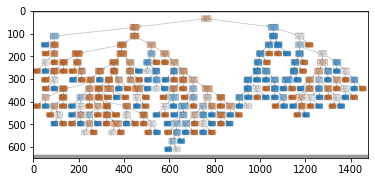

In [668]:

drive.mount('/content/gdrive')

r1 = imio.imread('/content/gdrive/My Drive/Tree.PNG')
plt.imshow(r1)

**Prediccion Final de todos los modelos**

In [669]:

def Mejor_modelo(X):
    

    svm_final = joblib.load("/content/gdrive/My Drive/svm.pkl")

    
   
    param_regLog = np.load("regLogParams.npz")
    w = param_regLog['w']
    b = param_regLog['b']
    regLogVarFilter = param_regLog['varFilter']

    
    

    modeloNBfrecuentista = np.load("modeloNBpandas.npz")
    NB_freq_varFilter = modeloNBfrecuentista['NB_Filter']
    NBFieldsEval = modeloNBfrecuentista['NBFieldsEval']
    Titanic_train = modeloNBfrecuentista['Titanic_train']
    NBFieldsTrain = np.append(NBFieldsEval, "Survived")
 
    Titanic_train = pd.DataFrame(Titanic_train, columns=NBFieldsTrain)
    Titanic_eval = pd.DataFrame(X[:, NB_freq_varFilter], columns=NBFieldsEval)
    
  
    tree_final = joblib.load("/content/gdrive/My Drive/decision_tree.pkl")

    
  
    y_pred_svm = svm_final.predict(X)
    y_pred_nbfreq = predecirNB(Titanic_train, Titanic_eval )
    y_pred_tree = tree_final.predict(X)
    y_pred_reglog = pred_log(X[:, regLogVarFilter], w, b)
    
  
    y_hat_models = np.column_stack((y_pred_svm, y_pred_nbfreq, 
                                    y_pred_tree, y_pred_reglog))
 
    y_hat, _ = stats.mode(y_hat_models, axis = 1)
  
    
    return y_hat, y_hat_models

In [670]:

y_hat, y_hat_models =  Mejor_modelo(X_val)

Models_best_Results = pd.DataFrame(np.column_stack((y_hat_models, y_hat)), 
             columns=["SVM", "Naïve Bayes Pandas", 
                      "Decision Tree", "Logistic", "best"])

In [671]:
Models_best_Results

,SVM,Naïve Bayes Pandas,Decision Tree,Logistic,best
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...
138,0.0,0.0,1.0,1.0,0.0
139,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0
141,1.0,0.0,1.0,1.0,1.0


In [672]:


y_hat_test, _ = Mejor_modelo(X_test)



# Evaluación sobre el conjunto de pruebas
Una vez obtenida una función mejormodelo(X) para obtener el pronóstico para cualquier vector de variables X, se procede a evaluar el sistema de votación de 4 

In [677]:
np.round(metrics.accuracy_score(y_test, y_hat_test),2)*100


80.0

El resultado cumple con el minimo que el profesor indico

# k-fold Cross-Validation


La validación cruzada es un método estadístico utilizado para estimar la capacidad de los modelos de aprendizaje automático.

Se usa comúnmente en el aprendizaje automático aplicado para comparar y seleccionar un modelo para un problema de modelado predictivo dado porque es fácil de entender, fácil de implementar y resulta en estimaciones de habilidades que generalmente tienen un sesgo menor que otros métodos.

# Conclusion:

1. Respecto a las dificultades del proyecto: lo que me pareció más difícil fue elmodelo Naive Bayes y como definir SVM. Tambien tome mucho tiempo en la parte de prueba, aparentemente necesito mejor mas mis conocimiento en esta herramienta.

2. feature engineering es una tecnica para reducir overfitting y la normalizacion de datos.

3. Tambien me surge la duda por que cada vez que se actualiza rand state los valores de acurracy cambia al inicio obtuve un acurracy de 87 pero luego de varias corrida logre un 80%

# **Ante Sala del Deployment**

In [767]:
titanic_dt

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Sex,Survived
0,1,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.014151,NaN,S,Lower,M,N,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,PC 17599,0.139136,C85,C,Upper,F,Y,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,3,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,Lower,F,Y,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.103644,C123,S,Upper,F,Y,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5,"Allen, Mr. William Henry",0.434531,0,0,373450,0.015713,NaN,S,Lower,M,N,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",0.334004,0,0,211536,0.025374,NaN,S,Middle,M,N,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887,888,"Graham, Miss. Margaret Edith",0.233476,0,0,112053,0.058556,B42,S,Upper,F,Y,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",0.346569,1,2,W./C. 6607,0.045771,NaN,S,Lower,F,N,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,"Behr, Mr. Karl Howell",0.321438,0,0,111369,0.058556,C148,C,Upper,M,Y,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [774]:
dat_1 = titanic_dt.drop(['PassengerId',	'Name','Ticket',	'Cabin',	'Embarked',	'passenger_class','passenger_sex',	'passenger_survived'], axis=1)
dat_2 = dat_1.values

["Age", "SibSp", "Parch", "Fare", "Sex", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper"]

In [777]:
train,test=train_test_split(dat_2,test_size=0.2,random_state=0)

In [782]:
DY_test = test[:,11]

pd.DataFrame(DY_test).to_csv('/content/gdrive/My Drive/Titanicdeployment_Y.csv', header=False, index=False)

In [779]:
DY_test

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.])

In [784]:
d_test = test[:,0:11]
pd.DataFrame(d_test).to_csv('/content/gdrive/My Drive/Titanicdeployment.csv', header=False, index=False)

In [783]:
d_test[:,0:11]

array([[0.34656949, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34656949, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08268409, 4.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3842674 , 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.28373963, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23347575, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])